In [2]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '1016.zip',
 'analysis.ipynb',
 'analysis_func.py',
 'analyze.py',
 'func_lsde.py',
 'graph2features.py',
 'main_2.py',
 'main_final.py',
 'main_use(1).py',
 'main_usenewest.py',
 'multiInOut.py',
 'negative_trans_number',
 'one2multiNegative.txt',
 'one2multiPositive.txt',
 'positive_trans_number',
 'RandomForest.ipynb',
 'result_criminality.txt',
 'result_donor.txt',
 'structure_analysis.py',
 'summary',
 'summarydataframe',
 'test.gpickle',
 '__pycache__']

In [4]:
f=open("result_donor.txt")
negative=eval(f.readline())
f.close()
f=open("result_criminality.txt")
positive=eval(f.readline())
f.close()

In [5]:
one2multi=pd.DataFrame(negative+positive)

In [6]:
one2multi.columns

Index([         '50_total',                   2,                  50,
                       100,                   5,                 200,
                        10,               'Tag',           '2_total',
              '1000_total',         '200_total',          '10_total',
                     'max',           '5_total',                1000,
               '500_total',                 500, 'Transaction_total',
         'Addresses_total',         '100_total'],
      dtype='object')

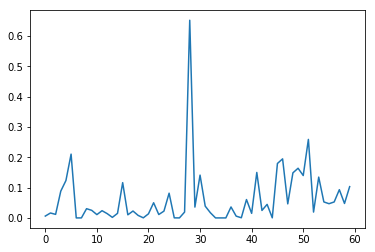

In [7]:
plt.plot(one2multi[10]/one2multi["Addresses_total"])

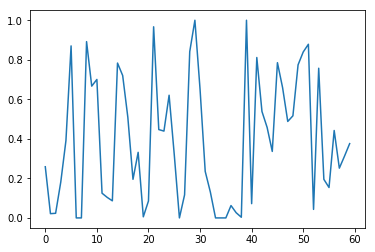

In [8]:
plt.plot(one2multi[10]/one2multi[2])

In [9]:
one2multiP=pd.DataFrame(positive)
one2multiN=pd.DataFrame(negative)

In [16]:
one2multiN.count()


50_total             24
2                    24
50                   24
100                  24
5                    24
200                  24
10                   24
Tag                  24
2_total              24
1000_total           24
200_total            24
10_total             24
max                  24
5_total              24
1000                 24
500_total            24
500                  24
Transaction_total    24
Addresses_total      24
100_total            24
dtype: int64

Text(0, 0.5, 'Precentage')

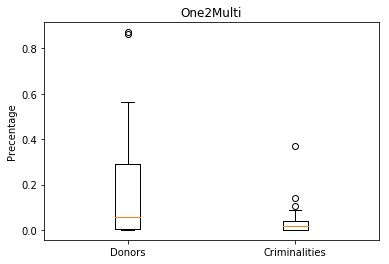

In [17]:
plt.boxplot([one2multiN[100]/one2multiN[2],one2multiP[100]/one2multiP[2]],labels=['Donors','Criminalities'])
plt.title('One2Multi')
plt.ylabel('Precentage')

{'boxes': [<matplotlib.lines.Line2D at 0x2758e14be48>,
 'caps': [<matplotlib.lines.Line2D at 0x2758e150a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x2758e156470>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2758e156128>,
 'whiskers': [<matplotlib.lines.Line2D at 0x2758e150438>,
  <matplotlib.lines.Line2D at 0x2758e156e48>]}

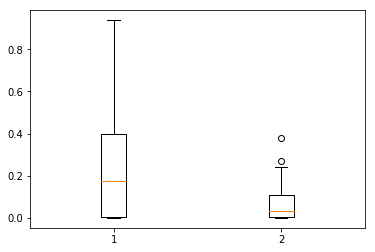

In [25]:
plt.boxplot([one2multiN[50]/one2multiN[2],one2multiP[50]/one2multiP[2]])

In [26]:
trans=one2multi[['Transaction_total','2_total','5_total','10_total','50_total','100_total','200_total',"500_total","1000_total"]]

In [27]:
presentage_trans=trans.apply(lambda x:x/x['Transaction_total'],axis=1)

In [28]:
negative_presentage=presentage_trans.loc[:23]
positive_presentage=presentage_trans.loc[24:]

In [29]:
negative_presentage.count()

Transaction_total    24
2_total              24
5_total              24
10_total             24
50_total             24
100_total            24
200_total            24
500_total            24
1000_total           24
dtype: int64

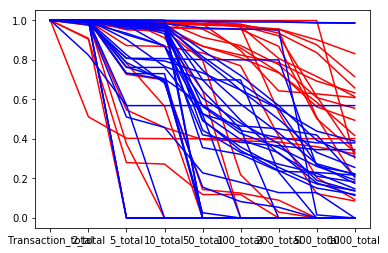

In [30]:
plt.plot(negative_presentage.T,'r')
plt.plot(positive_presentage.T,'b')

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

In [52]:
import matplotlib.pyplot as plt
def plot_roc_auc(model, y_test_true, x_test):
    x_ = np.linspace(0, 1, 10)
    y_test_pred_prob = model.predict_proba(x_test)[:, 1]
    y_test_pred = model.predict(x_test)
    fpr, tpr, thresholds = sk.metrics.roc_curve(y_test_true, y_test_pred_prob)
    plt.plot(x_, x_)
    plt.plot(fpr, tpr)
    plt.grid()
    plt.legend(['y=x', 'roc'])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.text(0.6, 0.3, 'accuracy = {}'.format(sk.metrics.accuracy_score(y_test_true, y_test_pred)))
    plt.text(0.6, 0.2, 'auc = {}'.format(sk.metrics.auc(fpr, tpr)))
    plt.show()

In [38]:
presentage_total=pd.concat([negative_presentage,positive_presentage])
# presentage_total['tag']=one2multi['Tag']

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(presentage_trans,one2multi['Tag'])

In [70]:
RF1=RandomForestClassifier(n_estimators=10,n_jobs=5,max_features=None)
RF1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
y_pre1=RF1.predict(x_test)
metrics.roc_auc_score(y_test,y_pre1)

0.5357142857142857

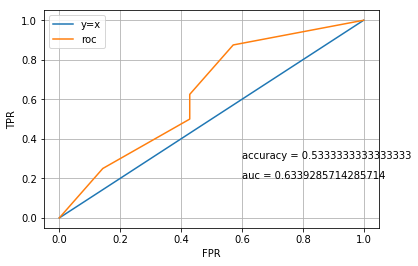

In [72]:
plot_roc_auc(RF1,y_test,x_test)

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(one2multi.drop(columns=['Tag']),one2multi['Tag'])

In [18]:
RF2=RandomForestClassifier(n_estimators=10,n_jobs=5,max_features=None)
RF2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
y_pre1=RF2.predict(x_test)
metrics.roc_auc_score(y_test,y_pre1)

0.5178571428571428

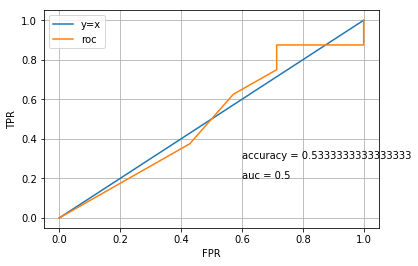

In [20]:
plot_roc_auc(RF2,y_test,x_test)

In [24]:
negative_list=[i.split(".")[0][9:] for i in os.listdir('../structures/donor/')]

In [25]:
positive_list=[i.split("_")[1][:-8] for i in os.listdir('../structures/criminality//')]

In [19]:
f=open("negative_trans_number")
negative_num=eval(f.readline())
f.close()
f=open("positive_trans_number")
positive_num=eval(f.readline())
f.close()

In [20]:
negative_num_df=pd.DataFrame(negative_num,columns=['input','output','tag'])
positive_num_df=pd.DataFrame(positive_num,columns=['input','output','tag'])

In [21]:
negative_num_df.max()

input                                          645
output                                       13107
tag       F92FEFB9C3182345917F843CF3942BBDB121C9C6
dtype: object

In [26]:
filter_negative=negative_num_df.loc[negative_num_df['tag'].isin(negative_list)]
filter_positive=positive_num_df.loc[positive_num_df['tag'].isin(positive_list)]

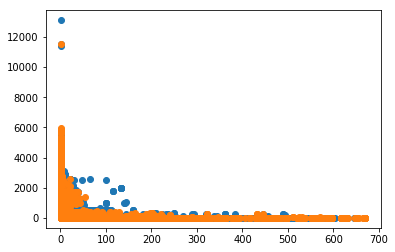

In [27]:
plt.plot(negative_num_df['input'],negative_num_df['output'],'o')
plt.plot(positive_num_df['input'],positive_num_df['output'],'o')

In [28]:
filter_multi_negative=filter_negative[(filter_negative['input']>=3) &(filter_negative['output']>=3)].groupby(['tag']).count()

In [29]:
filter_total_negative=filter_negative.groupby(['tag']).count()

In [30]:
filter_total_negative.count()

input     22
output    22
dtype: int64

In [31]:
filter_multi_negative.count()

input     16
output    16
dtype: int64

In [32]:
filter_presentage_negative=(filter_multi_negative['input']/filter_total_negative['input']).fillna(0)

In [33]:
filter_multi_positive=filter_positive[(filter_positive['input']>=3) &(filter_positive['output']>=3)].groupby(['tag']).count()
filter_total_positive=filter_positive.groupby(['tag']).count()
filter_presentage_positive=(filter_multi_positive['input']/filter_total_positive['input']).fillna(0)

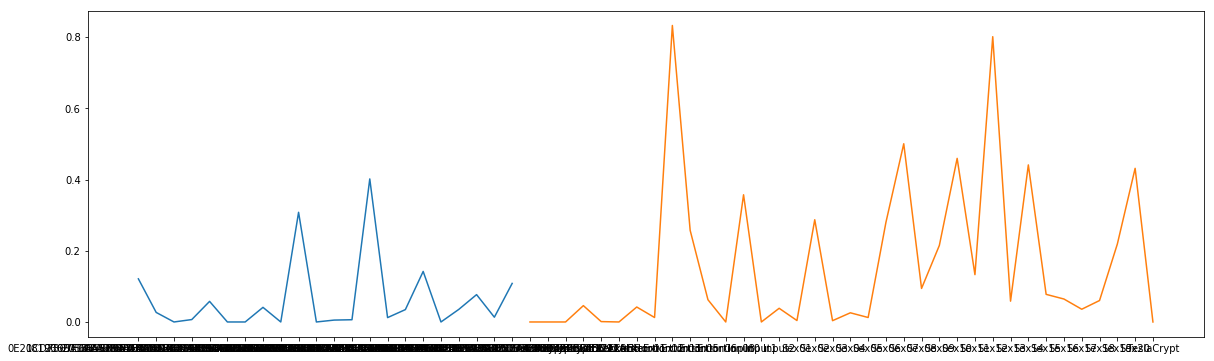

In [34]:
plt.figure(figsize=(20,6))
plt.plot(filter_presentage_negative)
plt.plot(filter_presentage_positive)

Text(0, 0.5, 'Precentage')

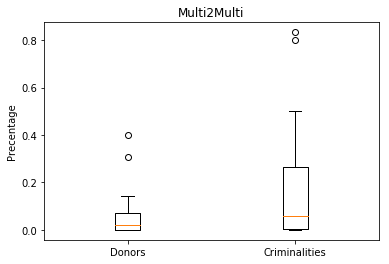

In [35]:
plt.boxplot([filter_presentage_negative,filter_presentage_positive],labels=['Donors','Criminalities'])
plt.title('Multi2Multi')
plt.ylabel('Precentage')

In [40]:
f=open("result_negative.txt")
negative=eval(f.readline())
f.close()
f=open("result_positive.txt")
positive=eval(f.readline())
f.close()

In [41]:
general_features=pd.DataFrame(negative+positive)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(general_features.drop(columns=['tag','Important nodes start-time','Important nodes end-time']),general_features['tag'])

In [59]:
RF1=RandomForestClassifier(n_estimators=10,n_jobs=5,max_features=None)
RF1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_pre1=RF1.predict(x_test)
metrics.roc_auc_score(y_test,y_pre1)

0.7916666666666667

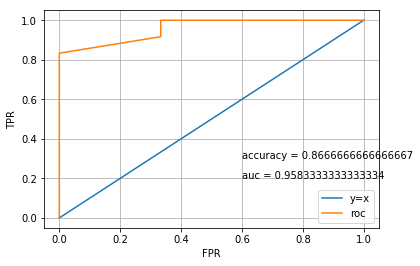

In [61]:
plot_roc_auc(RF1,y_test,x_test)

In [62]:
x_train.columns

Index(['Average value', 'Important nodes information',
       'Important nodes time difference', 'Max value', 'Median value',
       'Min value', 'Normality check(p-value)', 'One fourth value',
       'Percentage of in centrality>0.01 addresses',
       'Percentage of out centrality>0.01 addresses',
       'Significance test(p-value)', 'The max degree of all addresses',
       'This node as from', 'This node as to',
       'This node connected with(as from)', 'This node connected with(as to)',
       'Three fourth value', 'Total Transaction', 'Total addresses'],
      dtype='object')

In [63]:
RF1.feature_importances_

array([0.02434361, 0.02970964, 0.45704774, 0.05173012, 0.06069634,
       0.04764806, 0.        , 0.00185802, 0.03232026, 0.        ,
       0.        , 0.        , 0.06630643, 0.04927335, 0.03151172,
       0.        , 0.07655799, 0.03593556, 0.03506117])

In [42]:
featureP=pd.DataFrame(positive)
featureN=pd.DataFrame(negative)

In [43]:
featureP.min()

Average value                                  2.347031e+05
Important nodes end-time                       1.426448e+09
Important nodes information                    1.000000e+00
Important nodes start-time                     1.426448e+09
Important nodes time difference                0.000000e+00
Max value                                      2.480000e+06
Median value                                   1.000000e+04
Min value                                      0.000000e+00
Normality check(p-value)                       0.000000e+00
One fourth value                               1.000000e+04
Percentage of in centrality>0.01 addresses     0.000000e+00
Percentage of out centrality>0.01 addresses    4.506392e-04
Significance test(p-value)                     0.000000e+00
The max degree of all addresses                3.000000e+00
This node as from                              0.000000e+00
This node as to                                3.333333e-01
This node connected with(as from)       

Text(0.5, 1.0, 'First Transcaton & Time Difference')

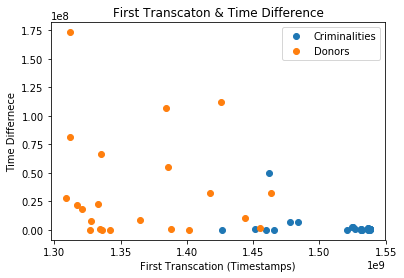

In [56]:
plt.plot(featureP['Important nodes start-time'],featureP['Important nodes time difference'],'o')
plt.plot(featureN['Important nodes start-time'],featureN['Important nodes time difference'],'o')
plt.xlabel('First Transcation (Timestamps)')
plt.ylabel('Time Differnece')
plt.legend(['Criminalities','Donors'])
plt.title('First Transcaton & Time Difference')

Text(0, 0.5, 'Time difference')

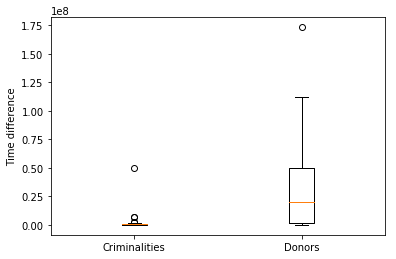

In [48]:
plt.boxplot([featureP['Important nodes time difference'],featureN['Important nodes time difference']],labels=['Criminalities','Donors'])
plt.ylabel('Time Difference')

In [49]:
f=open("time_negative.txt")
negative=eval(f.readline())
f.close()
f=open("time_positive.txt")
positive=eval(f.readline())
f.close()

In [50]:
time_df=pd.DataFrame(negative+positive)

In [51]:
timeP=pd.DataFrame(positive)
timeN=pd.DataFrame(negative)

Text(0.5, 1.0, 'Time Difference among the network')

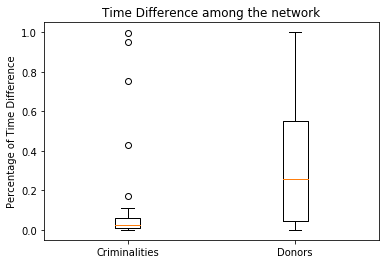

In [54]:
plt.boxplot([timeP['Central_difference']/timeP['Total_difference'],timeN['Central_difference']/timeN['Total_difference']],labels=['Criminalities','Donors'])
plt.ylabel('Percentage of Time Difference')
plt.title('Time Difference among the network')

In [62]:
f=open("donor.txt")
negative=eval(f.readline())
f.close()
f=open("criminality.txt")
positive=eval(f.readline())
f.close()

In [63]:
small_df=pd.DataFrame(negative+positive)

In [64]:
small_df=small_df.drop(columns=['Address','Filename', 'Important nodes end-time', 'Important nodes start-time'])


In [65]:
small_df.columns

Index(['Assortativity', 'Average cluster coefficient of the whole graph',
       'Average value', 'Chordal', 'Immediate dominator(numbers)',
       'Important nodes information', 'Important nodes time difference',
       'Is branching', 'Is simple path', 'Max value', 'Median value',
       'Min value', 'Normality check(p-value)', 'One fourth value',
       'Percentage of cluster coefficient>0 addresses',
       'Percentage of in centrality>0.01 addresses',
       'Percentage of out centrality>0.01 addresses',
       'Percentage of page Rank >0.01 address', 'Reciprocity',
       'Significance test(p-value)', 'Strongly connected', 'Tag',
       'The max degree of all addresses', 'This node as from',
       'This node as to', 'This node connected with(as from)',
       'This node connected with(as to)', 'Three fourth value',
       'Total Transaction', 'Total addresses', 'Transitivity', 'Triangles',
       'Weakly connected'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(small_df.drop(columns=['Tag']),small_df['Tag'])

In [67]:
RF1=RandomForestClassifier(n_estimators=10,n_jobs=5,max_features=None)
RF1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
y_pre1=RF1.predict(x_test)
metrics.roc_auc_score(y_test,y_pre1)

0.75

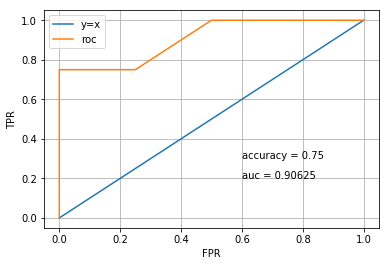

In [69]:
plot_roc_auc(RF1,y_test,x_test)

In [70]:
x_train.columns

Index(['Assortativity', 'Average cluster coefficient of the whole graph',
       'Average value', 'Chordal', 'Immediate dominator(numbers)',
       'Important nodes information', 'Important nodes time difference',
       'Is branching', 'Is simple path', 'Max value', 'Median value',
       'Min value', 'Normality check(p-value)', 'One fourth value',
       'Percentage of cluster coefficient>0 addresses',
       'Percentage of in centrality>0.01 addresses',
       'Percentage of out centrality>0.01 addresses',
       'Percentage of page Rank >0.01 address', 'Reciprocity',
       'Significance test(p-value)', 'Strongly connected',
       'The max degree of all addresses', 'This node as from',
       'This node as to', 'This node connected with(as from)',
       'This node connected with(as to)', 'Three fourth value',
       'Total Transaction', 'Total addresses', 'Transitivity', 'Triangles',
       'Weakly connected'],
      dtype='object')

In [71]:
RF1.feature_importances_

array([0.        , 0.04512821, 0.01410256, 0.        , 0.01833333,
       0.02156863, 0.11185897, 0.        , 0.        , 0.        ,
       0.        , 0.43867204, 0.        , 0.02894737, 0.        ,
       0.        , 0.        , 0.        , 0.12702614, 0.05769231,
       0.        , 0.        , 0.        , 0.08814103, 0.        ,
       0.        , 0.        , 0.        , 0.04852941, 0.        ,
       0.        , 0.        ])

In [72]:
for (x,y) in zip(x_train.columns,RF1.feature_importances_):
    print(x,y)

Assortativity 0.0
Average cluster coefficient of the whole graph 0.045128205128205125
Average value 0.014102564102564103
Chordal 0.0
Immediate dominator(numbers) 0.018333333333333337
Important nodes information 0.021568627450980402
Important nodes time difference 0.11185897435897436
Is branching 0.0
Is simple path 0.0
Max value 0.0
Median value 0.0
Min value 0.43867203831600116
Normality check(p-value) 0.0
One fourth value 0.028947368421052645
Percentage of cluster coefficient>0 addresses 0.0
Percentage of in centrality>0.01 addresses 0.0
Percentage of out centrality>0.01 addresses 0.0
Percentage of page Rank >0.01 address 0.0
Reciprocity 0.12702614379084967
Significance test(p-value) 0.05769230769230769
Strongly connected 0.0
The max degree of all addresses 0.0
This node as from 0.0
This node as to 0.08814102564102563
This node connected with(as from) 0.0
This node connected with(as to) 0.0
Three fourth value 0.0
Total Transaction 0.0
Total addresses 0.04852941176470588
Transitivity 0

In [90]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_curve
loo=LeaveOneOut()

In [100]:
y_pre=[]
y_true=[]
inportance=[]
for train_index,test_index in loo.split(small_df.drop(columns=['Tag'])):
    x_train, x_test = small_df.drop(columns=['Tag']).loc[train_index], small_df.drop(columns=['Tag']).loc[test_index]
    y_train, y_test =small_df['Tag'].loc[train_index], small_df['Tag'].loc[test_index]
    RF1=RandomForestClassifier(n_estimators=10,n_jobs=5,max_features=1.0)
    RF1.fit(x_train,y_train)
    y_pre1=RF1.predict(x_test)
    print(y_pre1,"----",y_test.values)
    tmp=dict()
    for (x,y) in zip(x_train.columns,RF1.feature_importances_):
        tmp[x]=y
    inportance.append(tmp)
    y_pre.append(y_pre1[0])
    y_true.append(y_test.values[0])

[0] ---- [0]
[0] ---- [0]
[1] ---- [0]
[1] ---- [0]
[1] ---- [0]
[1] ---- [0]
[0] ---- [0]
[0] ---- [0]
[1] ---- [0]
[0] ---- [0]
[0] ---- [0]
[0] ---- [0]
[0] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[0] ---- [1]
[0] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]
[1] ---- [1]


In [101]:
metrics.roc_auc_score(y_true,y_pre)

0.7083333333333334

In [102]:
metrics.roc_curve(y_true,y_pre, pos_label=1)

(array([0.        , 0.41666667, 1.        ]),
 array([0.        , 0.83333333, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [103]:
inportance_df=pd.DataFrame(inportance)

In [104]:
inportance_df.max()

Assortativity                                     0.031275
Average cluster coefficient of the whole graph    0.088850
Average value                                     0.077885
Chordal                                           0.010662
Immediate dominator(numbers)                      0.253321
Important nodes information                       0.095397
Important nodes time difference                   0.494129
Is branching                                      0.010985
Is simple path                                    0.000000
Max value                                         0.123620
Median value                                      0.213466
Min value                                         0.526514
Normality check(p-value)                          0.049208
One fourth value                                  0.077500
Percentage of cluster coefficient>0 addresses     0.085500
Percentage of in centrality>0.01 addresses        0.051411
Percentage of out centrality>0.01 addresses       0.0980

In [106]:
inportance_df

,Assortativity,Average cluster coefficient of the whole graph,Average value,Chordal,Immediate dominator(numbers),Important nodes information,Important nodes time difference,Is branching,Is simple path,Max value,...,This node as from,This node as to,This node connected with(as from),This node connected with(as to),Three fourth value,Total Transaction,Total addresses,Transitivity,Triangles,Weakly connected
0,0.012794,0.000000,0.077885,0.010662,0.065189,0.000000,0.208215,0.000000,0.0,0.000000,...,0.089137,0.059611,0.000000,0.000000,0.000000,0.015344,0.000000,0.013122,0.028835,0.0
1,0.013876,0.000000,0.026677,0.000000,0.045043,0.093136,0.140626,0.000000,0.0,0.031201,...,0.113052,0.057554,0.032955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.013567,0.000000,0.036217,0.000000,0.016477,0.000000,0.066481,0.000000,0.0,0.095784,...,0.052967,0.016440,0.024976,0.000000,0.027474,0.000000,0.000000,0.015344,0.013876,0.0
3,0.000000,0.018552,0.025550,0.000000,0.000000,0.042688,0.494129,0.000000,0.0,0.000000,...,0.049995,0.000000,0.033870,0.009764,0.050286,0.000000,0.052800,0.047856,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.048214,0.000000,0.216950,0.000000,0.0,0.056749,...,0.077626,0.013426,0.000000,0.000000,0.065476,0.000000,0.000000,0.000000,0.000000,0.0
5,0.012780,0.074561,0.000000,0.000000,0.095324,0.095397,0.046959,0.000000,0.0,0.039564,...,0.066466,0.062615,0.000000,0.037673,0.086615,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.023901,0.000000,0.084992,0.000000,0.339601,0.000000,0.0,0.000000,...,0.000000,0.076398,0.055691,0.025883,0.000000,0.019529,0.000000,0.000000,0.000000,0.0
7,0.013122,0.000000,0.000000,0.000000,0.054780,0.009477,0.313733,0.000000,0.0,0.023977,...,0.118746,0.053807,0.019882,0.054446,0.000000,0.000000,0.028324,0.000000,0.000000,0.0
8,0.000000,0.000000,0.000000,0.000000,0.111747,0.062338,0.049123,0.000000,0.0,0.037988,...,0.065942,0.012889,0.076765,0.047934,0.065476,0.013379,0.000000,0.000000,0.025422,0.0
9,0.031275,0.000000,0.000000,0.000000,0.074481,0.000000,0.239320,0.000000,0.0,0.015491,...,0.015344,0.055622,0.000000,0.000000,0.000000,0.011508,0.000000,0.000000,0.000000,0.0


In [63]:
f=open("newpoints_donor.txt")
negative=eval(f.readline())
f.close()
f=open("newpoints_criminality.txt")
positive=eval(f.readline())
f.close()

In [64]:
points_df=pd.DataFrame(negative+positive)

In [65]:
points_df

,0,1,2,3,4,5,6,7,Address,File,Tag,Total>=100,Total_nodes,other1,other2
0,0,0,0,0,0,0,1,0,14ELQwuU9JXxcuCUi7eQmKs8eTrpLZTnGR,donator2_236DFD6A6794B1B9E8FA771397198BE196C63...,0,1,684,0,0
1,0,0,0,0,0,3,1,0,153b1uipoiursFUwH4ysqKJHrecXKipwPH,donator2_2C5DBADB80AA0B2227193CE588ED91599069E...,0,4,2650,0,0
2,0,0,0,0,88,1,0,0,16QrWgSBTwFoaMRi3tbdYEXsxhBA8eAktw,donator2_3B5B86BE83B057E59DB5F4B303CD483EA7419...,0,89,6163,0,0
3,0,0,0,0,0,0,0,0,18xstBzJSjBGzNrc2ri2hSJ2qPKKEiMwLV,donator2_575A3BA7413C20EC58AF67EFD287525421091...,0,0,16,0,0
4,0,0,0,0,0,0,0,0,18zUkf7W5zY7ZdQg7Cda8cSW2XSaagcBDT,donator2_57A7C1D18064A28C6CD4AC5780EDA525EA4EA...,0,0,10,0,0
5,0,0,0,0,0,0,129,0,1AV8b35YrpDjZQ2VbbbV4Vf4odFD7rRmfP,donator2_680B1CB5A1590662F66823B866E8035483ACC...,0,129,4336,0,0
6,0,0,0,0,0,0,0,0,1AkF8Fr9qhxLtRz6XK5T2cFcnN7okXKcv6,donator2_6AE6CF3855FEAC7A0C02B371DEF7AD5FBED66...,0,0,80,0,0
7,0,0,75,0,22,5,3,0,1AmrTbctN5d8SF3bRowFacjWAvx1VK2uHq,donator2_6B34B865EB075648D21663B7A475F2A7EB090...,0,105,12656,0,0
8,0,0,0,0,0,0,0,0,1Aw7qFziLu2giXNrMuRJvasZ21if1XF7UP,donator2_6CF54C0E51E363D77F6322009A3563EB13659...,0,0,42,0,0
9,0,0,137,0,152,10,195,0,1Eativ8CxgM6XQoQZbtEgH9GZzyy4qk5Q8,donator2_950289B0D0792052E9B5E95D55884EFAABA0B...,0,494,116797,0,0


In [92]:
ans=points_df.groupby(['Tag']).sum()

In [94]:
ans.columns=['type 0', 'type 1', 'type 2', 'type 3', 'type 4', 'type 5', 'type 6', 'type 7', 'Total>=100', 'Total_nodes',
       'other1', 'other2']

In [95]:
ans

,type 0,type 1,type 2,type 3,type 4,type 5,type 6,type 7,Total>=100,Total_nodes,other1,other2
Tag,,,,,,,,,,,,
0,0,0,293,0,379,317,1212,0,2201,380272,0,0
1,0,0,8,0,1191,23,636,0,1858,293822,0,0


In [89]:
f=open("negative_multi_number")
negative=eval(f.readline())
f.close()
f=open("positive_multi_number")
positive=eval(f.readline())
f.close()

In [90]:
multi_df=pd.DataFrame(negative+positive)

In [96]:
ans=multi_df.groupby(['tag']).sum()

In [98]:
ans.columns=['type 0',"type 2", "type 4", "type 5", "type 6"]

In [99]:
ans

,type 0,type 2,type 4,type 5,type 6
tag,,,,,
0,397,659,686,2329,14345
1,0,0,459,3968,50692
